In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [7]:
from vaneska.interpolate import ScipyRectBivariateSpline
import tensorflow as tf

In [8]:
y, x = np.mgrid[0:10:1j*100, 0:10:1j*100]
z = x ** 2 + y ** 2

In [9]:
interp = ScipyRectBivariateSpline(x[0], y[:, 0], z)

In [10]:
xc = tf.Variable(7., dtype=tf.float64)
yc = tf.Variable(3., dtype=tf.float64)

In [11]:
xt = tf.constant(np.linspace(0., 10., 100), dtype=tf.float64)
yt = tf.constant(np.linspace(0., 10., 100), dtype=tf.float64)

In [12]:
img = interp(tf.subtract(xt, xc),
             tf.subtract(yt, yc))

In [14]:
sess = tf.Session()

In [15]:
sess.run(tf.global_variables_initializer())

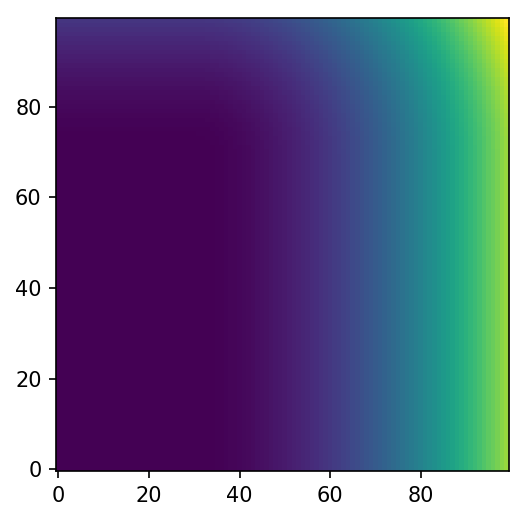

In [16]:
plt.imshow(sess.run(img), origin='lower')

In [22]:
grad = tf.gradients(img, xc)

In [23]:
grad

[<tf.Tensor 'gradients_2/Sub_grad/Reshape_1:0' shape=() dtype=float64>]

In [24]:
plt.imshow(sess.run(grad), origin='lower')

InvalidArgumentError: Input to reshape is a tensor with 100 values, but the requested shape has 1
	 [[Node: gradients_2/Sub_grad/Reshape_1 = Reshape[T=DT_DOUBLE, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients_2/Sub_grad/Neg, gradients_2/Sub_grad/Shape_1)]]

Caused by op 'gradients_2/Sub_grad/Reshape_1', defined at:
  File "/Users/jvmirca/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/jvmirca/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-d8831477c212>", line 1, in <module>
    grad = tf.gradients(img, xc)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 611, in gradients
    lambda: grad_fn(op, *out_grads))
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 377, in _MaybeCompile
    return grad_fn()  # Exit early
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 611, in <lambda>
    lambda: grad_fn(op, *out_grads))
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py", line 777, in _SubGrad
    array_ops.reshape(-math_ops.reduce_sum(grad, ry), sy))
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3903, in reshape
    "Reshape", tensor=tensor, shape=shape, name=name)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op 'Sub', defined at:
  File "/Users/jvmirca/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 18 identical lines from previous traceback]
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-fa473e3baf67>", line 1, in <module>
    img = interp(tf.subtract(xt, xc),
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 348, in subtract
    return gen_math_ops._sub(x, y, name)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 4819, in _sub
    "Sub", x=x, y=y, name=name)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Input to reshape is a tensor with 100 values, but the requested shape has 1
	 [[Node: gradients_2/Sub_grad/Reshape_1 = Reshape[T=DT_DOUBLE, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients_2/Sub_grad/Neg, gradients_2/Sub_grad/Shape_1)]]
